<a href="https://colab.research.google.com/github/Kai71584/ia-reconnaissance-de-caract-re/blob/main/Projet_IA_INF1853.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

précision2 : 0.872


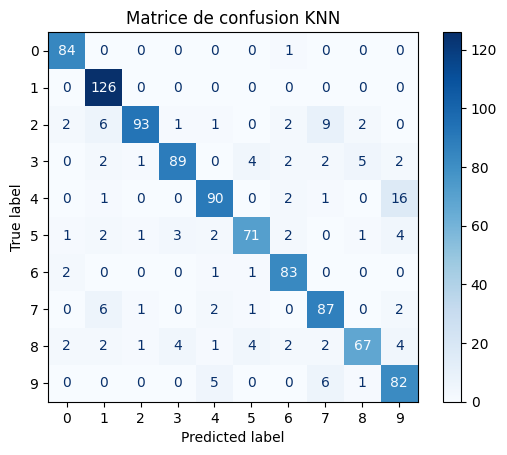

In [ ]:
# MATRICE DE CONFUSION K PLUS PROCHE VOISIN, LE CODE COMPLET POUR KNN EST PLUS BAS!!!!!!!!!!!!!!!!!!!!!
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from matplotlib import pyplot
import numpy as np
import random

#loading
(train_X, train_y), (test_X, test_y) = mnist.load_data()

real_values = []
predicted_values = []
k = 3 #nombre de voisin desire
for idx in range(1000):
    img_ToPredict = (test_X[idx].flatten()) / 255
    real_value = test_y[idx]
    tab_dist = []
    dist = 0
    for i in range(2000): #boucle pour parcourir la banque d'image d'entrainement
      sum = 0
      vector_img = (train_X[i].flatten())/255 #on transforme l'image en un vecteur et on reduit la valeur des pixels entre 0 et 1
      vector_res = vector_img - img_ToPredict #on calcule la difference entre les 2 vecteurs
      for j in range(len(vector_res)): #on additionne chaque valeur du vecteur obtenue entre eux
        sum += (vector_res[j]**2)
      dist = np.sqrt(sum) #on trouve la distance entre les 2 images
      tab_dist.append((dist, train_y[i])) #on ajoute les distances et leur labels dans un tableau

    def trier_dist (x): # fonction pour specifier sur quelle critere on se base pour trier le tableau des distances
      return x[0]
    tab_dist.sort(key = trier_dist) #on trie le tableau en fonction de leur distance

    k_voisin = tab_dist[:k] #on garde les k plus proches voisins

    #on calcule le nombre de fois qu'un etiquette apparait dans le tableau des k plus proches voisins
    label_counts = {} # on initialise un dictionnaire pour associer un etiquette a leur nombre d'occurence (EX: {"9": "3"} -> veut dire que 9 apparait 3 fois dans k_voisin)
    for _, label in k_voisin:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

    predict_value = max(label_counts, key=label_counts.get) #on trouve l'etiquette qui a la plus grande occurrence en utilisant max et en specifiant de se fier sur leur occurrence (.get)
    real_values.append(real_value)
    predicted_values.append(predict_value)

conf_matrix = confusion_matrix(real_values, predicted_values)
precision_score = accuracy_score(real_values, predicted_values)
print('Le taux de précision pour KNN est de: ', precision_score)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
disp.plot(cmap=pyplot.cm.Blues)
pyplot.title("Matrice de confusion KNN")
pyplot.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train:  (60000, 28, 28)
Y_train:  (60000,)
X_test:   (10000, 28, 28)
Y_test:   (10000,)


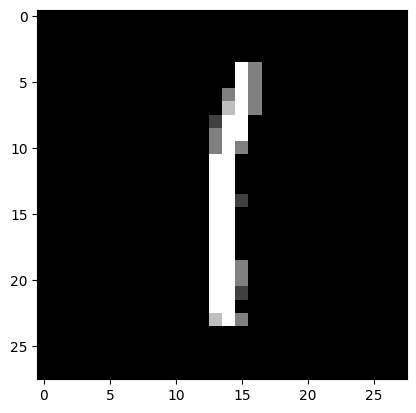

Les k plus proches voisins (distance, etiquette) sont:  [(1.5832601816404543, 1), (1.820938492498868, 1), (2.0638258556936817, 1)]
Valeur predite :  1
Valeur reelle:  1
La prediction est bonne


In [ ]:
#!!!!!!!!!!!!!!!!!!!METHODE K PLUS PROCHE VOISIN!!!!!!!!!!!!!!!!!!!!!!

from keras.datasets import mnist
from matplotlib import pyplot
import numpy as np
import random

#loading
(train_X, train_y), (test_X, test_y) = mnist.load_data()

#shape of dataset
print('X_train: ', train_X.shape)
print('Y_train: ', train_y.shape)
print('X_test:  ', test_X.shape)
print('Y_test:  ', test_y.shape)

#plotting
random_img = random.randint(0, len(test_X))
img_ToPredict = (test_X[random_img].flatten())/255 #on transforme l'image en un vecteur et on reduit la valeur des pixels entre 0 et 1 (reduit la grosseur des calculs)
real_value = test_y[random_img] #valeur reelle de l'image a predire
pyplot.imshow(test_X[random_img], cmap=pyplot.get_cmap('gray'))
pyplot.show()

k = 3 #nombre de voisin desire

tab_dist = []
dist = 0
for i in range(len(train_X)): #boucle pour parcourir la banque d'image d'entrainement
  sum = 0
  vector_img = (train_X[i].flatten())/255 #on transforme l'image en un vecteur et on reduit la valeur des pixels entre 0 et 1
  vector_res = vector_img - img_ToPredict #on calcule la difference entre les 2 vecteurs
  for j in range(len(vector_res)): #on additionne chaque valeur du vecteur obtenue entre eux
    sum += (vector_res[j]**2)
  dist = np.sqrt(sum) #on trouve la distance entre les 2 images
  tab_dist.append((dist, train_y[i])) #on ajoute les distances et leur labels dans un tableau

def trier_dist (x): # fonction pour specifier sur quelle critere on se base pour trier le tableau des distances
  return x[0]
tab_dist.sort(key = trier_dist) #on trie le tableau en fonction de leur distance

k_voisin = tab_dist[:k] #on garde les k plus proches voisins
print("Les k plus proches voisins (distance, etiquette) sont: ", k_voisin)

#on calcule le nombre de fois qu'un etiquette apparait dans le tableau des k plus proches voisins
label_counts = {} # on initialise un dictionnaire pour associer un etiquette a leur nombre d'occurence (EX: {"9": "3"} -> veut dire que 9 apparait 3 fois dans k_voisin)
for _, label in k_voisin:
    if label in label_counts:
        label_counts[label] += 1
    else:
        label_counts[label] = 1

predict_value = max(label_counts, key=label_counts.get) #on trouve l'etiquette qui a la plus grande occurrence en utilisant max et en specifiant de se fier sur leur occurrence (.get)

print("Valeur predite : ", predict_value)
print("Valeur reelle: ", real_value)

if (predict_value == real_value):
  print("La prediction est bonne")
else:
  print("La prediction est fausse.")

X_train:  (60000, 28, 28)
Y_train:  (60000,)
X_test:   (10000, 28, 28)
Y_test:   (10000,)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Probabilité pour les données d'entrainement :  0.9567666666666667
Probabilité pour les données tests : 0.9418

affichage de la valeur prédite : [6]
précision2 : 0.9425

affichage de la valeur prédite après ajustement [6]


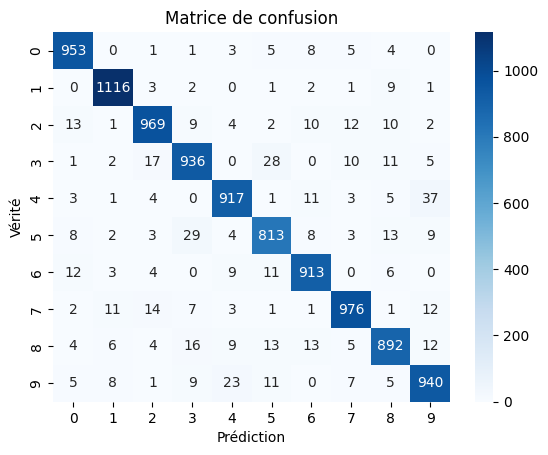

Valeur prédite :  6
Valeur réelle:  6
La prédiction est bonne


In [ ]:
# réseaux de neurones
#temps 2 et 50 secondes
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import random



(train_X, train_y), (test_X, test_y) = mnist.load_data()

random_img = random.randint(0, len(test_X))
print('X_train: ', train_X.shape)
print('Y_train: ', train_y.shape)
print('X_test:  ', test_X.shape)
print('Y_test:  ', test_y.shape)



train_X = train_X.reshape(train_X.shape[0], -1)/255 # train_X.shape[0] donne le nombre d'image (nombre_d'images, hauteur, largeur, canaux),  le tout permet  de donner un vecteur en 1d ou il y a 60000 image, chaque image a 784(28*28) éléments
test_X = test_X.reshape(test_X.shape[0], -1)/255 # le diviser par 255, c'est pour connaître si c'est 1 ou 0, cela facilite la prédiction

mlp = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(10,10,10), random_state=1) # trois couches cachées de 10 neurones chacun

mlp.fit(train_X,train_y) # le train_X va indiquer le nombre d'image et le nombre de pixels pour chaque image, le train_y affiche le nombre correspondent

probentrainement = mlp.score(train_X,train_y)#probabilité pour les données d'entraînement
probtest=mlp.score(test_X,test_y)#probabilité pour les données tests, #comparaison, entre le nombre de valeur prédit qui sont correct de predictionglobal et le nombre de vraies valeurs de test_y, et donne le pourcentage de réussite


print(f"Probabilité pour les données d'entrainement :  {probentrainement}")
print(f"Probabilité pour les données tests : {probtest}")


predictc1=mlp.predict(test_X[random_img].reshape(1,-1))
print()
print(f"affichage de la valeur prédite : {predictc1}") #affiche la valeur prédite

#ajustement du modèle
mlp.set_params(learning_rate_init=1e-5)#ajustement du modèle avec 1e-5
mlp.partial_fit(train_X,train_y) #ajuster avec les nouvelles modifications

pred=mlp.predict(test_X)
a=accuracy_score(test_y,pred)
print(f"précision2 : {a}")#comparaison, entre le nombre de valeur prédit qui sont correct de predictionglobal et le nombre de vraies valeurs de test_y, et donne le pourcentage de réussite
predictc=mlp.predict(test_X[random_img].reshape(1,-1))
print()
print("affichage de la valeur prédite après ajustement",predictc) #affiche la prédiction après l'ajustement

cm= confusion_matrix(test_y,pred)#matrice de confusion
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))

plt.ylabel('Vérité')
plt.xlabel('Prédiction')
plt.title('Matrice de confusion')
plt.show()# affiche la matrice de confusion

# transformer la réponse en entier
entier = int(predictc1[0])
#print(entier)

print("Valeur prédite : ", entier)
print("Valeur réelle: ", test_y[random_img])



if (entier == test_y[random_img]):
  print("La prédiction est bonne")
else:
  print("La prédiction est fausse.")

#ajouter valeur predict et valeur réel à la fin, mettre afficher mes prints et commentaires